In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
print(cv2.__version__)

4.2.0


In [3]:
# Open the device at the ID 0
# Use the camera ID based on
# /dev/videoID needed
cap = cv2.VideoCapture(0)

#Check if camera was opened correctly
if not (cap.isOpened()):
    print("Could not open video device")


#Set the resolution
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Set Exposure time and Camera gain
# cap.set(cv2.CAP_PROP_EXPOSURE, 40) 
# cap.set(cv2.CAP_PROP_GAIN, 1.0)

# see all properties here:
# https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d

# Just capture a single frame
_ret, frame = cap.read()

# When everything done, release the capture
cap.release()


Text(0.5, 1.0, 'Captured image in grayscale')

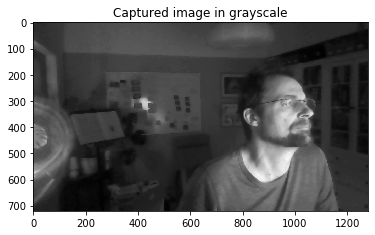

In [4]:
# Convert to a grayscale image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Captured image in grayscale")

Text(0.5, 1.0, 'Captured image in color')

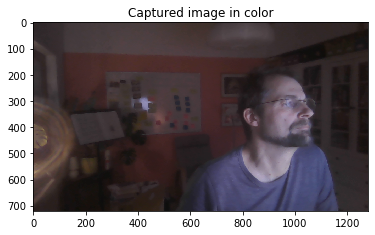

In [5]:
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.title("Captured image in color")

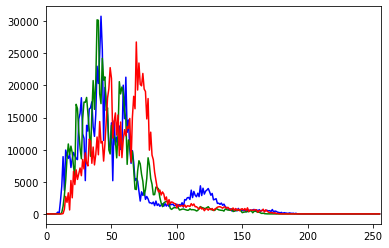

In [6]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([frame],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

Text(0.5, 1.0, 'ROI in grayscale')

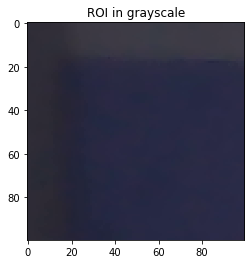

In [7]:
# -------------------------------------------
# |                                         | 
# |    (x1, y1)      w                      |
# |      ------------------------           |
# |      |                      |           |
# |      |                      |           | 
# |      |         ROI          | h         |  
# |      |                      |           |   
# |      |                      |           |   
# |      |                      |           |       
# |      ------------------------           |   
# |                           (x2, y2)      |    
# |                                         |             
# |                                         |             
# |                                         |             
# -------------------------------------------
x1, y1 = 100, 100
x2, y2 = 200, 200
roi = frame[y1:y2, x1:x2]
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGRA2GRAY)
plt.imshow(roi)
plt.title("ROI in grayscale")

In [8]:
mean, std = cv2.meanStdDev(roi_gray)
print(f"RoI mean: {mean[0,0]} RoI standard deviation: {std[0,0]}")

RoI mean: 49.4596 RoI standard deviation: 5.276075041164591
